In [0]:
!pip install tensorflow==2.0.0-rc0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [7]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
data.shape

(7254, 27)

In [0]:
img_width = 350
img_height = 350

In [10]:
X=[]
for i in tqdm(range(len(data.index))):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path = path, target_size = (img_height, img_width, 3))
  img = image.img_to_array(img)
  img = img/np.max(img)
  X.append(img)

X = np.array(X)  

100%|██████████| 7254/7254 [00:29<00:00, 248.30it/s]


In [11]:
X.shape

(7254, 350, 350, 3)

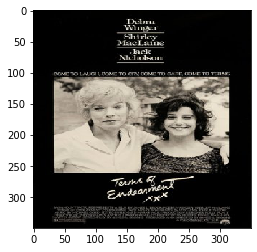

In [12]:
plt.figure()
plt.imshow(X[0])

In [13]:
data['Genre'][0]

"['Comedy', 'Drama']"

In [0]:
y = data.drop(['Id', 'Genre'], axis=1)

In [0]:
y = y.to_numpy()

In [16]:
y[0]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [17]:
X[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.        ]],

       ...,

       [[0.11372549, 0.11372549, 0.11372549],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0

**CNN Model**

In [0]:
model = Sequential()

model.add(Conv2D(filters = 100, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Conv2D(filters = 100, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Conv2D(filters = 100, kernel_size=(2, 2), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(25, activation='sigmoid'))  ## sigmoid because for each class we have either 0 or 1 and all classes are equaly likely 


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 174, 174, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 173, 173, 100)     0         
_________________________________________________________________
dropout (Dropout)            (None, 173, 173, 100)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 173, 173, 100)     400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 86, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 100)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 100)       0

In [0]:
model.compile(optimizer='adam', epochs=7, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X, y, epochs=5)

Train on 7254 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
7254/7254 [==============================] - 273s 38ms/sample - loss: 0.5913 - accuracy: 0.6926
Epoch 2/5
7254/7254 [==============================] - 273s 38ms/sample - loss: 0.2715 - accuracy: 0.9056
Epoch 3/5
7254/7254 [==============================] - 276s 38ms/sample - loss: 0.2479 - accuracy: 0.9093
Epoch 4/5
7254/7254 [==============================] - 277s 38ms/sample - loss: 0.2429 - accuracy: 0.9107
Epoch 5/5
7254/7254 [==============================] - 278s 38ms/sample - loss: 0.2403 - accuracy: 0.9116


Text(0.5, 1.0, 'Model Accuracy')

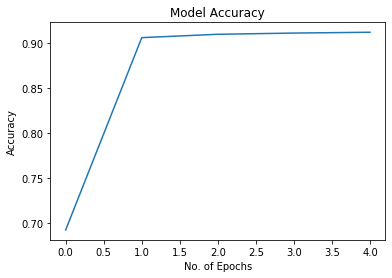

In [22]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model Loss')

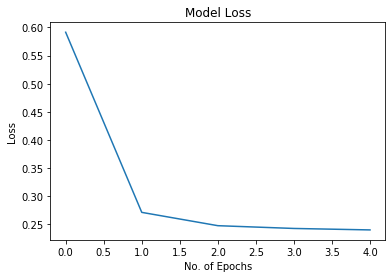

In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

**Testing the Model**

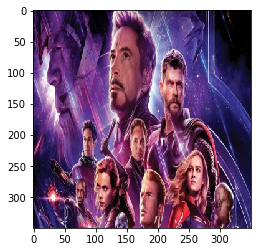

In [25]:
path = '/content/Movies-Poster_Dataset/endgame.jpg' 
img = image.load_img(path = path, target_size = (img_height, img_width, 3))
plt.plot()
plt.imshow(img)
img = image.img_to_array(img)
img = img.reshape(1, img_height, img_width, 3)
img = img/np.max(img)

In [0]:
y_pred = model.predict(img)

In [27]:
y_pred

array([[0.25717503, 0.10348186, 0.01195341, 0.0609253 , 0.16143444,
        0.20642015, 0.09066084, 0.5456697 , 0.02506185, 0.07018837,
        0.03252864, 0.12501147, 0.03602141, 0.00769189, 0.08807993,
        0.00180891, 0.00234827, 0.00121859, 0.10557956, 0.0693697 ,
        0.00648916, 0.02040589, 0.18679476, 0.01552922, 0.00536412]],
      dtype=float32)

In [0]:
y_pred_sort = np.argsort(y_pred[0])

In [30]:
y_pred_sort

array([17, 15, 16, 24, 20, 13,  2, 23, 21,  8, 10, 12,  3, 19,  9, 14,  6,
        1, 18, 11,  4, 22,  5,  0,  7])

In [0]:
top_3 = y_pred_sort[-3:]

In [36]:
top_3

array([5, 0, 7])

In [41]:
for i in range(3):
  print(list(data.columns)[top_3[i]+2])

Crime
Action
Drama
